In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
data = pd.read_csv("TableFinal.csv", sep =",", header= 0)
data = data.fillna(0)
data.head()
data.columns

Index(['Fraction_Size', 'Depth', 'Lakes_names', 'Assembly',
       ' contigs (>= 10000 bp)', 'Total length (>= 10000 bp)', ' contigs',
       'Largest contig', 'Total length', 'N50', 'archaea', 'bacteria',
       'eukarya', 'organelle', 'prokarya', 'unknown', 'mitochondrion',
       'plastid'],
      dtype='object')

In [3]:
data_resume = data.describe()
data_resume

,contigs (>= 10000 bp),Total length (>= 10000 bp),contigs,Largest contig,Total length,N50,archaea,bacteria,eukarya,organelle,prokarya,unknown,mitochondrion,plastid
count,474.000000,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,10117.546414,2.331105e+08,1.190849e+06,4.960194e+05,1.542350e+09,1708.154008,2769.748945,47854.947257,12814.217300,792.854430,817.278481,1246.618143,250.120253,517.424051
std,3437.029704,9.481195e+07,4.187519e+05,2.102427e+05,4.301984e+08,680.921422,1603.100786,20756.173010,10591.325342,757.563192,436.778238,715.362431,266.522790,473.674663
min,6.000000,1.179660e+05,3.422000e+04,3.640300e+04,2.469464e+07,710.000000,0.000000,1.000000,16.000000,8.000000,0.000000,1.000000,2.000000,6.000000
25%,8000.000000,1.720470e+08,8.840618e+05,3.428195e+05,1.279054e+09,1327.250000,1685.000000,34253.000000,5340.750000,342.500000,510.000000,698.500000,100.250000,218.250000
50%,9832.000000,2.248545e+08,1.164152e+06,4.492475e+05,1.562013e+09,1551.000000,2439.000000,47274.000000,10159.000000,580.000000,746.000000,1096.500000,171.500000,387.000000
75%,12181.000000,2.776099e+08,1.464225e+06,6.257482e+05,1.811878e+09,1929.000000,3546.250000,60675.750000,16919.750000,900.500000,1061.250000,1657.750000,273.250000,610.750000
max,22270.000000,6.228489e+08,2.457872e+06,1.579285e+06,3.095510e+09,7390.000000,8462.000000,126789.000000,83080.000000,5814.000000,2321.000000,4401.000000,1928.000000,3646.000000


In [5]:
data[" contigs"].sum()

564462459.0

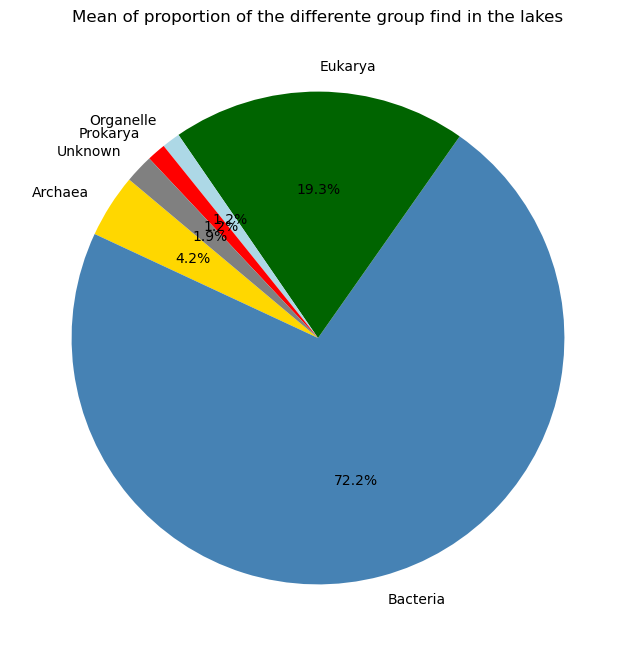

In [4]:
# Calculer les proportions

archaea = data_resume['archaea'].iloc[1]
bacteria = data_resume['bacteria'].iloc[1]
eukarya = data_resume['eukarya'].iloc[1]  
organelle = data_resume['organelle'].iloc[1]  
prokarya = data_resume['prokarya'].iloc[1]  
unknown = data_resume['unknown'].iloc[1]  
  
  
total = archaea + bacteria + eukarya + organelle + prokarya + unknown
proportions = [archaea/total, bacteria/total,eukarya/total,organelle/total,prokarya/total,unknown/total]
labels = ['Archaea', 'Bacteria', 'Eukarya', 'Organelle', 'Prokarya', 'Unknown']

# Créer le diagramme en camembert
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=140, colors=['gold', 'SteelBlue', 'darkgreen', 'lightblue','red','grey'])
plt.title('Mean of proportion of the differente group find in the lakes')
plt.show()

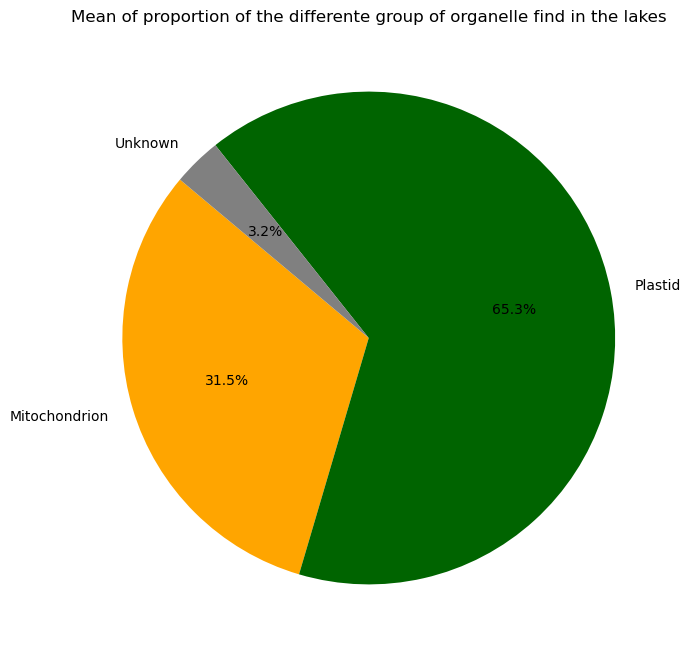

In [5]:
mitochondrion = data_resume['mitochondrion'].iloc[1]
plastid = data_resume['plastid'].iloc[1]
unknown = organelle - (mitochondrion + plastid)


total = mitochondrion + plastid + unknown
proportions = [mitochondrion/total, plastid/total,unknown/total]
labels = ['Mitochondrion', 'Plastid', 'Unknown']

# Créer le diagramme en camembert
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=140, colors=['orange', 'darkgreen', 'grey'])
plt.title('Mean of proportion of the differente group of organelle find in the lakes')
plt.show()

In [9]:
# Créer un tableau avec des colonnes
table = PrettyTable()
table.field_names = ["Number of contigs (means)", "Number of plastid (means)", "Proportion of plastid (means in %)"]

contigs=data[" contigs"].mean()
plastid=data['plastid'].mean()
Proportion=str((plastid/contigs)*100) + "%"

# Ajouter des lignes au tableau
table.add_row([contigs, plastid, Proportion])

# Afficher le tableau
print(table)

+---------------------------+---------------------------+------------------------------------+
| Number of contigs (means) | Number of plastid (means) | Proportion of plastid (means in %) |
+---------------------------+---------------------------+------------------------------------+
|     1190849.069620253     |     517.4240506329114     |        0.04345001090674837%        |
+---------------------------+---------------------------+------------------------------------+


In [92]:
Analyse = pd.read_csv("results.csv", sep = ";", decimal=".", thousands=",")
cols_to_convert = ['2.5KB', '5KB', '10KB', '25KB', '50KB', '100KB']
Analyse[cols_to_convert] = Analyse[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Vérification des types de données
print(Analyse.dtypes)
Analyse

nom       object
2.5KB      int64
5KB        int64
10KB       int64
25KB       int64
50KB       int64
100KB    float64
dtype: object


,nom,2.5KB,5KB,10KB,25KB,50KB,100KB
0,AMAD,1306,541,126,42,20,4.0
1,ARCA,2637,873,181,51,19,4.0
2,ATTR,4670,1976,524,112,41,6.0
3,AYDT,2798,1222,254,62,21,3.0
4,BALM,3406,1391,287,68,22,9.0
...,...,...,...,...,...,...,...
72,VRNZ,619,306,135,39,13,2.0
73,VSVK,1092,486,123,39,17,3.0
74,WOLF,5057,2274,602,103,32,6.0
75,ZLUT,10558,5177,1591,215,58,15.0


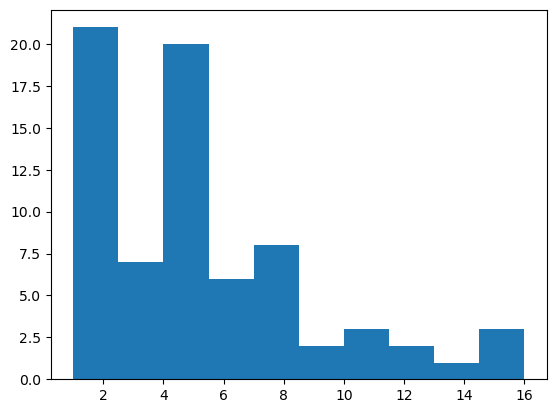

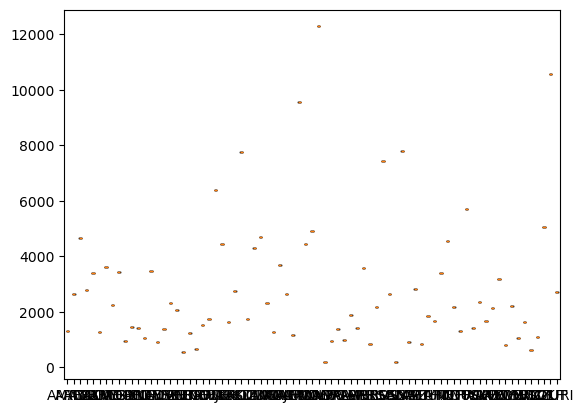

In [93]:
#plt.hist(Analyse["2.5KB"],bins=30)
#plt.show()

#plt.hist(Analyse["5KB"],bins=80)
#plt.show()

#plt.hist(Analyse["10KB"],bins=50)
#plt.show()

#plt.hist(Analyse["25KB"],bins=30)
#plt.show()

#plt.hist(Analyse["50KB"],bins=20)
#plt.show()

plt.hist(Analyse["100KB"],bins=10)
plt.show()

# Préparer les données pour le boxplot
data_to_plot = [Analyse[Analyse['nom'] == lake]["2.5KB"] for lake in Analyse['nom']]
plt.boxplot(data_to_plot, labels=Analyse['nom'], vert=True, patch_artist=True)
plt.show()

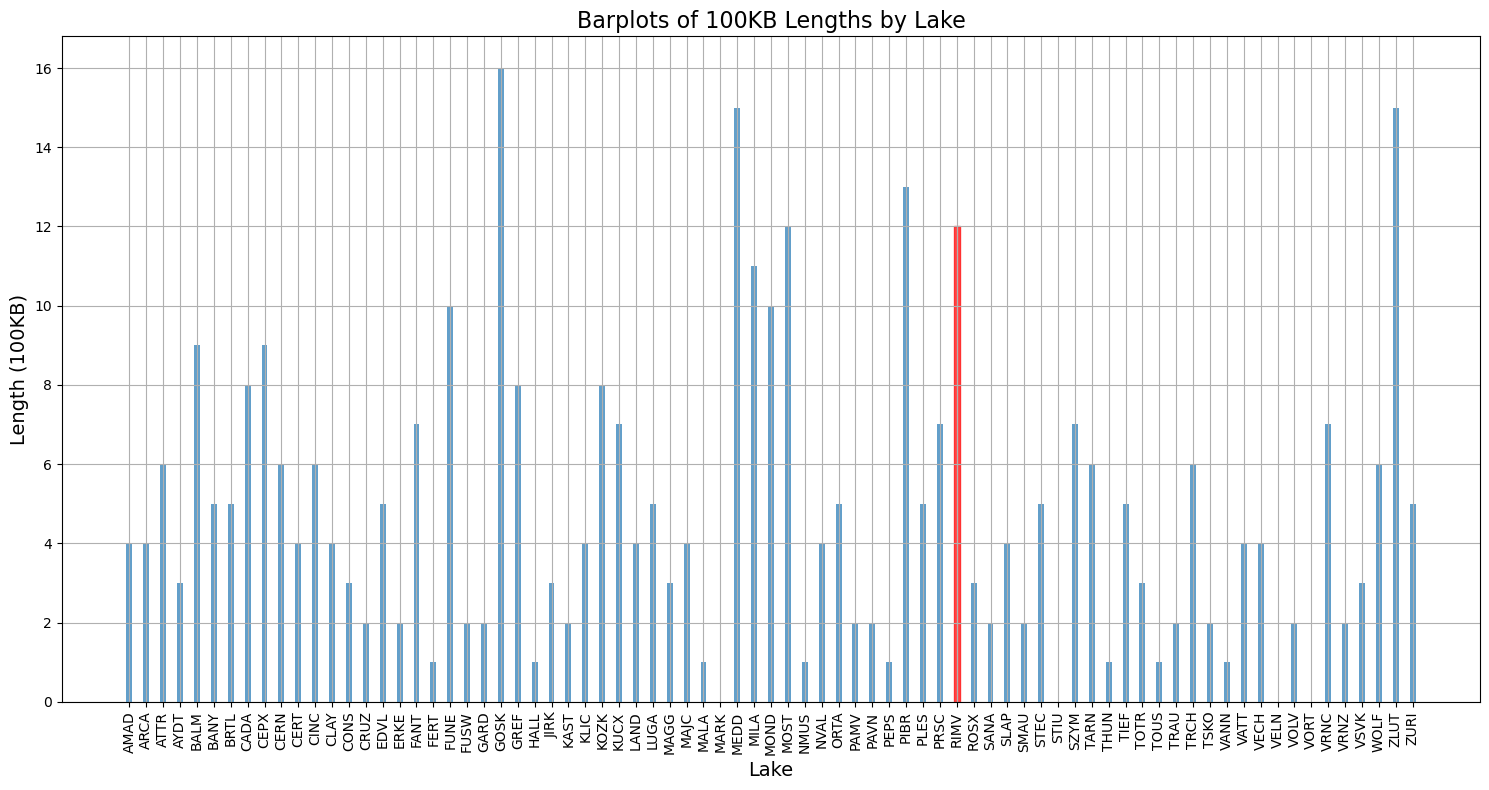

In [94]:
import numpy as np
# Position des barplots sur l'axe X
x_pos = np.arange(len(Analyse['nom']))

# Créer la figure et l'axe
plt.figure(figsize=(15, 8))

# Tracer les barplots pour chaque lac
bar_width = 0.35
bars = plt.bar(x_pos, Analyse['100KB'], width=bar_width, align='center', alpha=0.7, label='100KB')

# Mettre en évidence le barplot pour le lac "RIMV" en rouge
rimv_index = Analyse[Analyse['nom'] == 'RIMV'].index[0]
bars[rimv_index].set_color('red')  # Colorer la barre correspondant à "RIMV" en rouge

# Étiqueter les barplots
plt.xlabel('Lake', fontsize=14)
plt.ylabel('Length (100KB)', fontsize=14)
plt.title('Barplots of 100KB Lengths by Lake', fontsize=16)
plt.xticks(x_pos, Analyse['nom'], rotation=90, fontsize=10)

plt.tight_layout()
plt.grid(True)
plt.show()

In [95]:
sizes = ['2.5KB', '5KB', '10KB', '25KB', '50KB', '100KB']
# Initialisation d'un dictionnaire pour stocker les résultats
resultats = {}

# Parcours des tailles spécifiques
for size in sizes:
    # Trouver le lac ayant le plus de contigs pour cette taille
    top_lake = Analyse.loc[Analyse[size].idxmax()]
    
    # Ajouter les résultats au dictionnaire
    resultats[size] = {
        'Taille': size,
        'Lac avec le plus de contigs': top_lake['nom'],
        'Nombre de contigs': top_lake[size]
    }

# Création d'un DataFrame à partir du dictionnaire de résultats
tableau_final = pd.DataFrame(resultats.values())

# Affichage du tableau final
print("Tableau des meilleurs lacs pour chaque classe de taille de contigs:")
print(tableau_final)


Tableau des meilleurs lacs pour chaque classe de taille de contigs:
  Taille Lac avec le plus de contigs  Nombre de contigs
0  2.5KB                        MOST            12283.0
1    5KB                        MOST             6161.0
2   10KB                        MOST             1940.0
3   25KB                        MOST              275.0
4   50KB                        RIMV               69.0
5  100KB                        GOSK               16.0


In [96]:
from tabulate import tabulate
# Initialisation d'un dictionnaire pour stocker les résultats
resultats = {}

# Parcours des tailles spécifiques
for size in sizes:
    # Trouver les 3 lacs ayant le plus de contigs pour cette taille
    top_lakes = Analyse.nlargest(3, size)
    
    # Ajouter les résultats au dictionnaire
    resultats[size] = {
        'Taille': [size] * len(top_lakes),  # Répéter la taille pour chaque lac
        'Lac avec le plus de contigs': top_lakes['nom'].tolist(),
        'Nombre de contigs': top_lakes[size].tolist()
    }

# Création d'un DataFrame à partir du dictionnaire de résultats
tableau_initial = pd.DataFrame({
    'Taille': [item for sublist in resultats.values() for item in sublist['Taille']],
    'Lac avec le plus de contigs': [item for sublist in resultats.values() for item in sublist['Lac avec le plus de contigs']],
    'Nombre de contigs': [item for sublist in resultats.values() for item in sublist['Nombre de contigs']]
})

# Affichage du tableau final
print("Tableau des top 3 lacs pour chaque classe de taille de contigs:")


rang = 1
derniere_taille = ""
for idx, row in tableau_initial.iterrows():
    taille = row["Taille"]
    if taille != derniere_taille:
        rang = 1
    tableau_initial.loc[idx, "Rang"] = f"{rang}er"
    rang += 1
    derniere_taille = taille

# Convertir le tableau en format tabulaire avec tabulate
tableau_formate = tabulate(tableau_initial, headers='keys', tablefmt='fancy_grid', showindex=False)

# Affichage du tableau final
print("Tableau des top 3 lacs pour chaque classe de taille de contigs avec le rang :")
print(tableau_formate)

Tableau des top 3 lacs pour chaque classe de taille de contigs:
Tableau des top 3 lacs pour chaque classe de taille de contigs avec le rang :
╒══════════╤═══════════════════════════════╤═════════════════════╤════════╕
│ Taille   │ Lac avec le plus de contigs   │   Nombre de contigs │ Rang   │
╞══════════╪═══════════════════════════════╪═════════════════════╪════════╡
│ 2.5KB    │ MOST                          │               12283 │ 1er    │
├──────────┼───────────────────────────────┼─────────────────────┼────────┤
│ 2.5KB    │ ZLUT                          │               10558 │ 2er    │
├──────────┼───────────────────────────────┼─────────────────────┼────────┤
│ 2.5KB    │ MEDD                          │                9568 │ 3er    │
├──────────┼───────────────────────────────┼─────────────────────┼────────┤
│ 5KB      │ MOST                          │                6161 │ 1er    │
├──────────┼───────────────────────────────┼─────────────────────┼────────┤
│ 5KB      │ ZLUT     

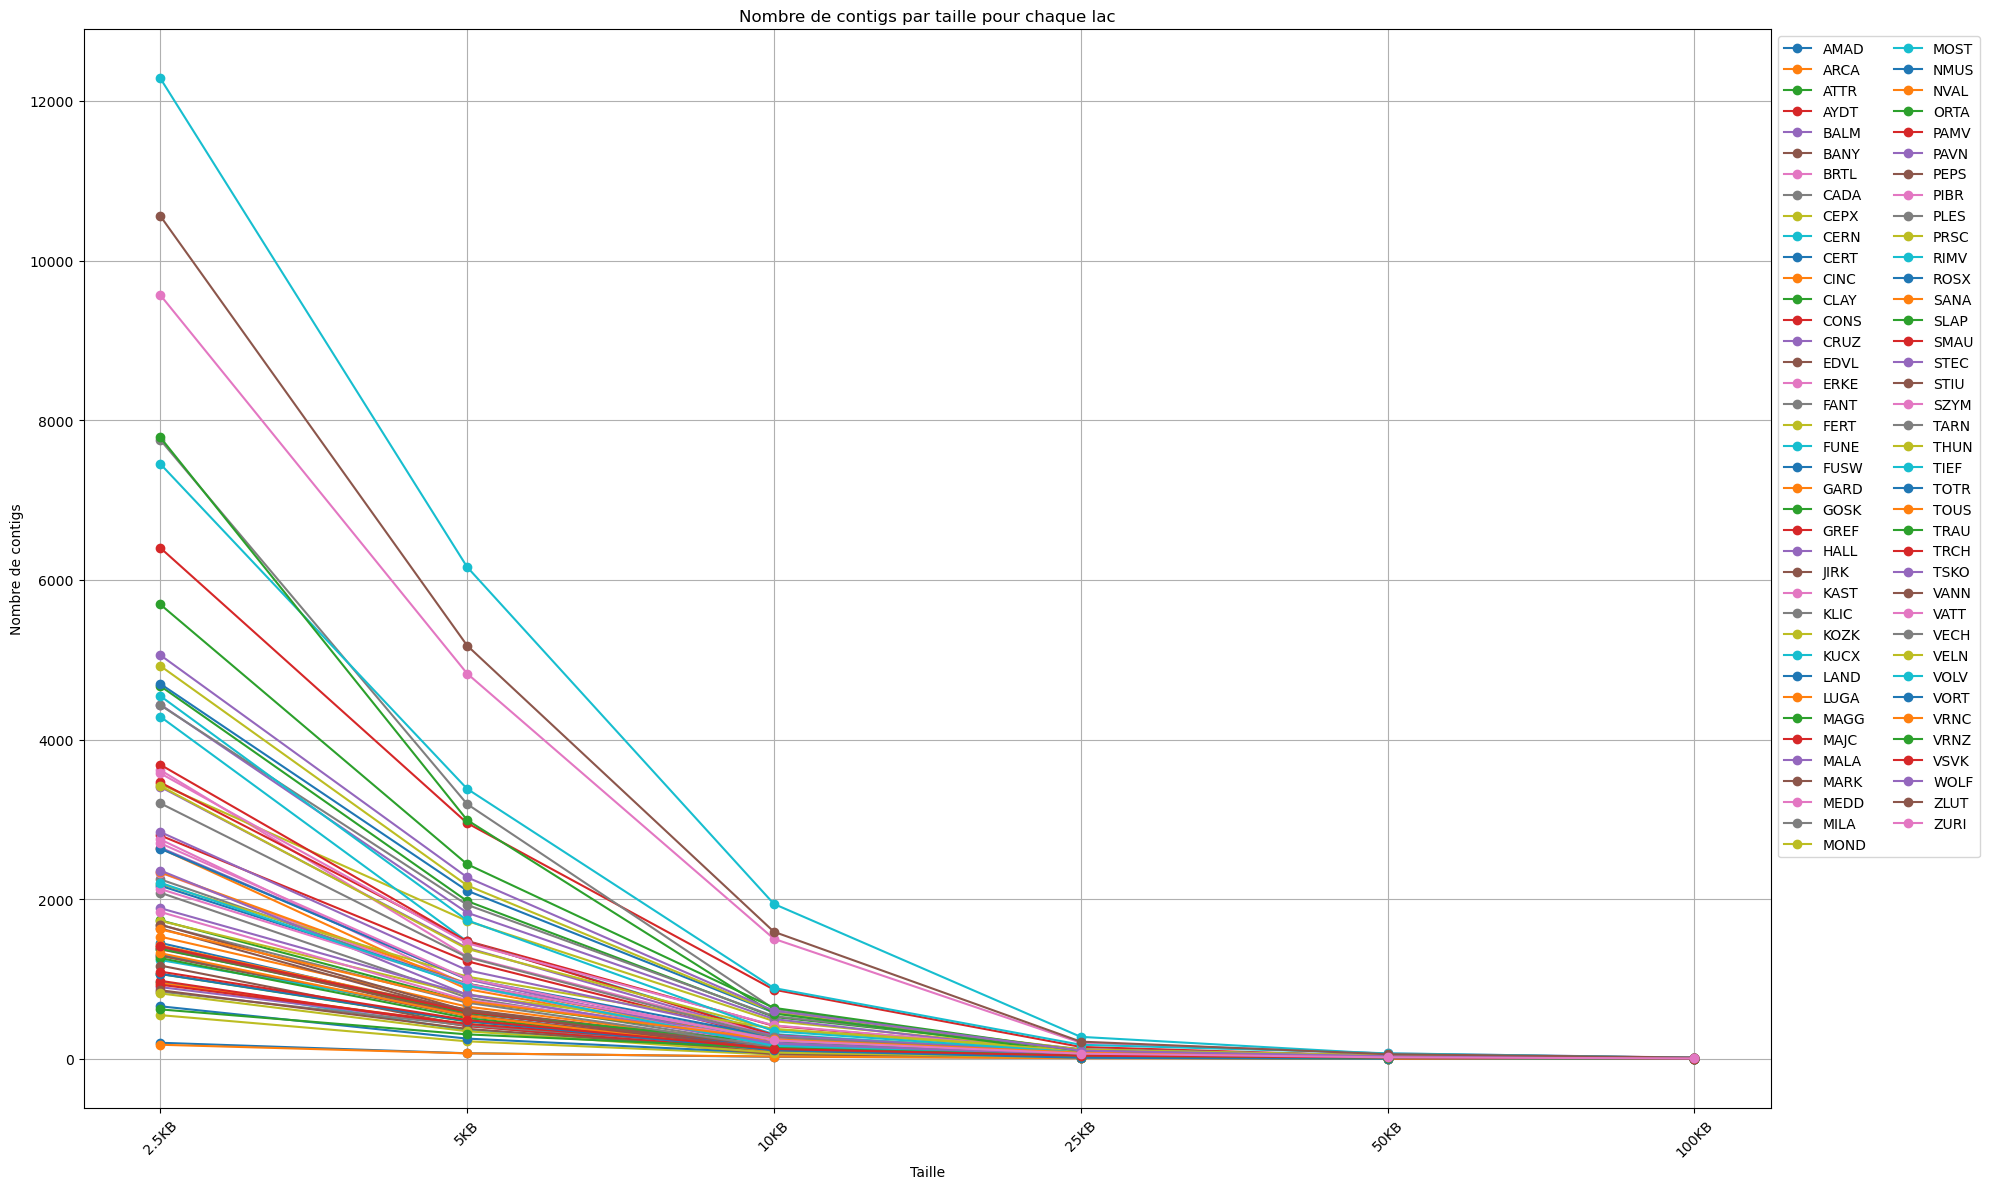

In [97]:
# Créer une figure et un axe
plt.figure(figsize=(20, 12))

# Tracer les courbes pour chaque lac
for index, row in Analyse.iterrows():
    plt.plot(sizes, row[sizes], marker='o', label=row['nom'])

# Personnaliser le graphique
plt.title('Nombre de contigs par taille pour chaque lac')
plt.xlabel('Taille')
plt.ylabel('Nombre de contigs')
plt.xticks(rotation=45)

# Afficher la légende sur 8 colonnes
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

# Afficher le graphique
plt.grid(True)
plt.tight_layout()
plt.show()

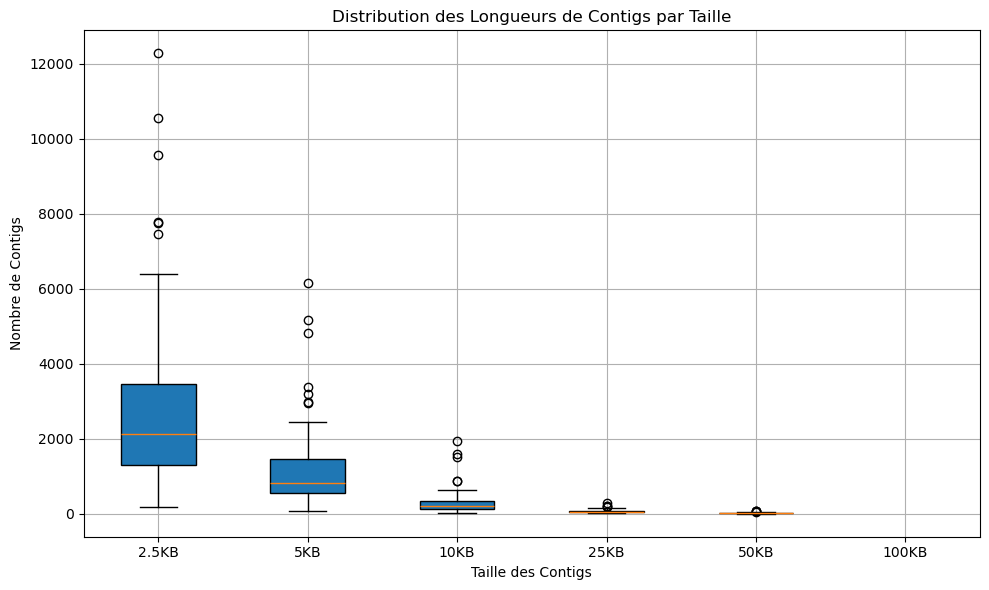

In [98]:
plt.figure(figsize=(10, 6))

# Tracer les boxplots pour chaque colonne de longueur de contig
box = plt.boxplot([Analyse['2.5KB'], Analyse['5KB'], Analyse['10KB'], Analyse['25KB'], Analyse['50KB'], Analyse['100KB']],
                  labels=['2.5KB', '5KB', '10KB', '25KB', '50KB', '100KB'], patch_artist=True)

# Personnaliser le graphique
plt.title('Distribution des Longueurs de Contigs par Taille')
plt.xlabel('Taille des Contigs')
plt.ylabel('Nombre de Contigs')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()

# Afficher le graphique
plt.show()

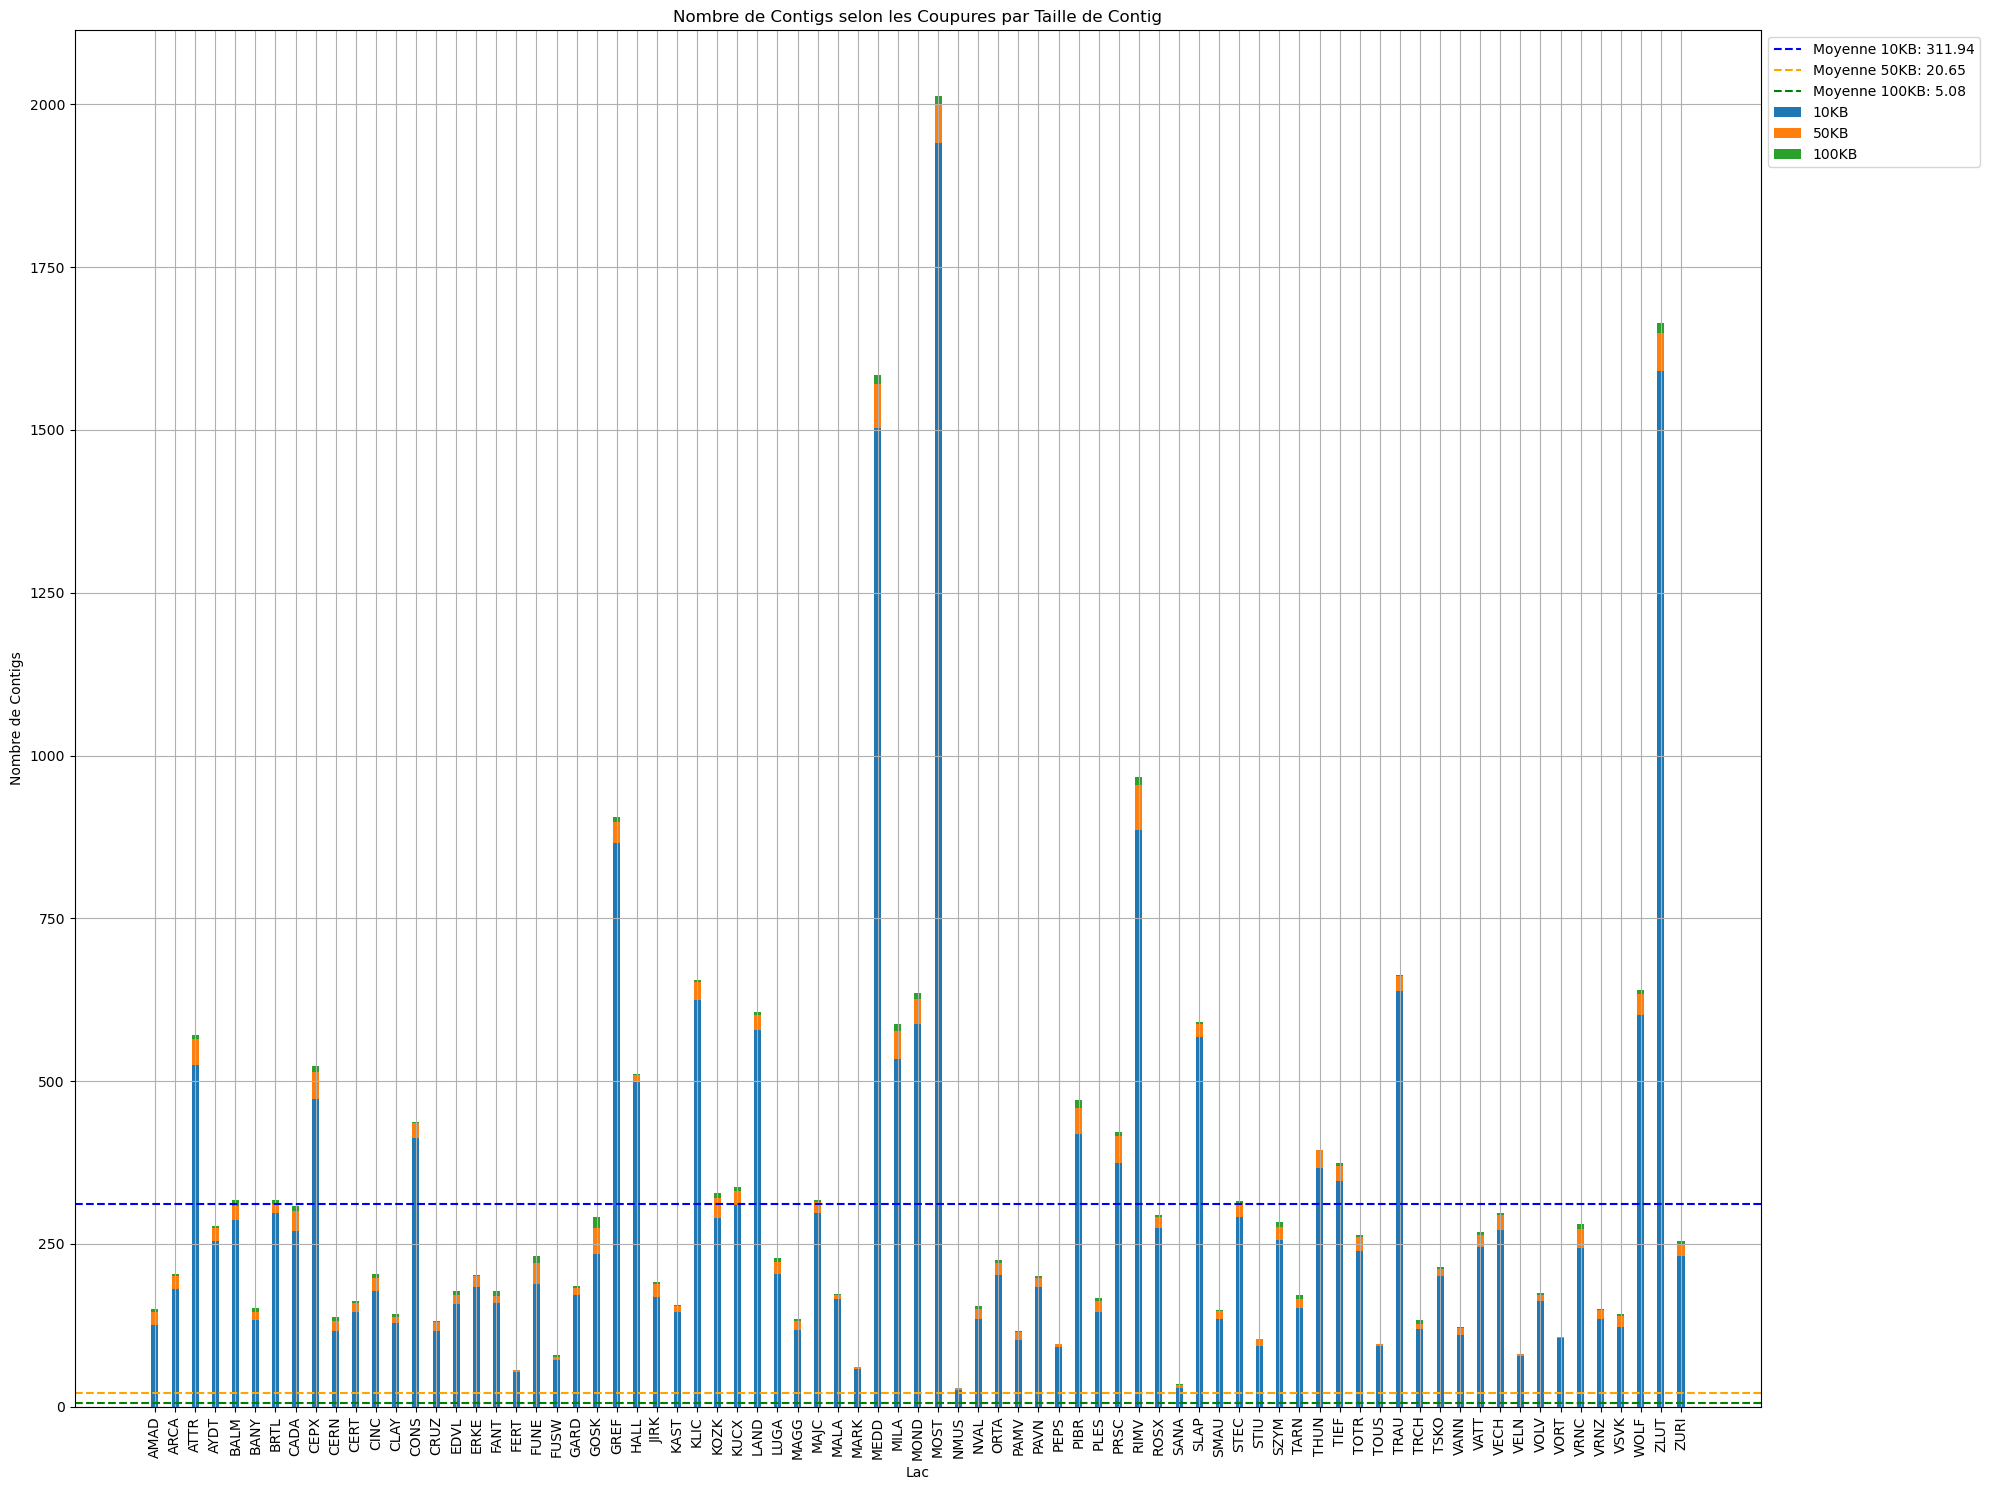

In [99]:
# Calculer le nombre de contigs respectant les coupures
cutoffs = ['10KB', '50KB', '100KB']
counts = Analyse[cutoffs].apply(lambda x: (x >= 1).sum(), axis=0)

# Calculer la moyenne pour chaque coupe
averages = Analyse[cutoffs].mean()

# Créer une figure et un axe pour les barplots empilés
plt.figure(figsize=(20, 15))

# Tracer les barplots empilés
bar_width = 0.35
bars1 = plt.bar(Analyse['nom'], Analyse['10KB'], width=bar_width, label='10KB')
bars2 = plt.bar(Analyse['nom'], Analyse['50KB'], width=bar_width, bottom=Analyse['10KB'], label='50KB')
bars3 = plt.bar(Analyse['nom'], Analyse['100KB'], width=bar_width, bottom=Analyse['10KB'] + Analyse['50KB'], label='100KB')

# Marquer la moyenne pour chaque coupe
plt.axhline(y=averages['10KB'], color='blue', linestyle='--', label=f'Moyenne 10KB: {averages["10KB"]:.2f}')
plt.axhline(y=averages['50KB'], color='orange', linestyle='--', label=f'Moyenne 50KB: {averages["50KB"]:.2f}')
plt.axhline(y=averages['100KB'], color='green', linestyle='--', label=f'Moyenne 100KB: {averages["100KB"]:.2f}')

# Personnaliser le graphique
plt.title('Nombre de Contigs selon les Coupures par Taille de Contig')
plt.xlabel('Lac')
plt.ylabel('Nombre de Contigs')
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Afficher le graphique
plt.show()


In [100]:
Analyse.sum()


nom      AMADARCAATTRAYDTBALMBANYBRTLCADACEPXCERNCERTCI...
2.5KB                                               215392
5KB                                                  91850
10KB                                                 24019
25KB                                                  4967
50KB                                                  1590
100KB                                                371.0
dtype: object

In [101]:
dataPostGeneious = pd.read_csv("Merged_data.tsv", sep ="\t")
dataPostGeneious = dataPostGeneious.drop(columns=['Fraction_Size'])
dataPostGeneious = dataPostGeneious.drop(columns=['Depth'])
dataPostGeneious = dataPostGeneious.drop(columns=['Assembly'])
dataPostGeneious = dataPostGeneious.drop(columns=['Total length (>= 0 bp)'])
dataPostGeneious = dataPostGeneious.drop(columns=['Total length (>= 1000 bp)'])
dataPostGeneious = dataPostGeneious.drop(columns=['Total length (>= 5000 bp)'])
dataPostGeneious = dataPostGeneious.drop(columns=['Total length (>= 10000 bp)'])
dataPostGeneious = dataPostGeneious.drop(columns=['Total length (>= 50000 bp)'])
dataPostGeneious = dataPostGeneious.drop(columns=['Total length'])
dataPostGeneious = dataPostGeneious.drop(columns=['N90'])
dataPostGeneious = dataPostGeneious.dropna(how='all')
dataPostGeneious.head()

,Lakes_names,contigs (>= 0 bp),contigs (>= 1000 bp),contigs (>= 5000 bp),contigs (>= 10000 bp),contigs (>= 25000 bp),contigs (>= 50000 bp),Total length (>= 25000 bp),contigs,Largest contig,N50,auN,L50,L90,N's per 100 kbp
0,AMAD,1670.0,1670.0,661.0,133.0,41.0,13.0,1839780.0,1670.0,103920.0,6600.0,15081.5,391.0,1333.0,0.0
2,ARCA,3210.0,3210.0,1027.0,198.0,69.0,16.0,2909040.0,3210.0,104040.0,5520.0,13253.1,817.0,2617.0,0.0
4,ATTR,5875.0,5875.0,2220.0,427.0,84.0,24.0,3727680.0,5875.0,103260.0,6000.0,12131.0,1561.0,4771.0,0.0
6,AYDT,4024.0,4024.0,1488.0,252.0,57.0,15.0,2577300.0,4024.0,108660.0,5760.0,12221.1,1096.0,3284.0,0.0
8,BALM,4830.0,4830.0,1772.0,332.0,90.0,23.0,3847560.0,4830.0,188040.0,6000.0,13681.0,1244.0,3918.0,0.0


In [102]:
dataPostGeneious[' contigs'] = dataPostGeneious[' contigs'].astype(int)
dataPostGeneious[' contigs (>= 0 bp)'] = dataPostGeneious[' contigs (>= 0 bp)'].astype(int)
(dataPostGeneious[' contigs'] == dataPostGeneious[' contigs (>= 0 bp)']).all()

True

In [103]:
dataPostGeneious = dataPostGeneious.rename(columns={
    "Lakes_names": "nom", 
    " contigs (>= 0 bp)": "0KB",
    " contigs (>= 1000 bp)": "1KB",
    " contigs (>= 5000 bp)": "5KB", 
    " contigs (>= 10000 bp)": "10KB",
    " contigs (>= 25000 bp)": "25KB",
    " contigs (>= 50000 bp)": "50KB"
})

In [104]:
dataPostGeneious

,nom,0KB,1KB,5KB,10KB,25KB,50KB,Total length (>= 25000 bp),contigs,Largest contig,N50,auN,L50,L90,N's per 100 kbp
0,AMAD,1670,1670.0,661.0,133.0,41.0,13.0,1839780.0,1670,103920.0,6600.0,15081.5,391.0,1333.0,0.0
2,ARCA,3210,3210.0,1027.0,198.0,69.0,16.0,2909040.0,3210,104040.0,5520.0,13253.1,817.0,2617.0,0.0
4,ATTR,5875,5875.0,2220.0,427.0,84.0,24.0,3727680.0,5875,103260.0,6000.0,12131.0,1561.0,4771.0,0.0
6,AYDT,4024,4024.0,1488.0,252.0,57.0,15.0,2577300.0,4024,108660.0,5760.0,12221.1,1096.0,3284.0,0.0
8,BALM,4830,4830.0,1772.0,332.0,90.0,23.0,3847560.0,4830,188040.0,6000.0,13681.0,1244.0,3918.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,VRNZ,701,701.0,339.0,142.0,40.0,10.0,1702980.0,701,100680.0,11100.0,20626.2,121.0,520.0,0.0
146,VSVK,1301,1301.0,543.0,124.0,41.0,9.0,1801980.0,1301,105720.0,7020.0,16228.4,288.0,1028.0,0.0
148,WOLF,6483,6483.0,2473.0,392.0,70.0,19.0,3118980.0,6483,104700.0,5880.0,10921.4,1831.0,5301.0,0.0
150,ZLUT,18093,18093.0,6734.0,981.0,177.0,45.0,7498440.0,18093,104040.0,5640.0,9934.1,5261.0,14869.0,0.0


In [113]:


merged_data = pd.merge(Analyse, dataPostGeneious, on='nom', suffixes=('_Apres', '_Avant'))

# Réinitialiser l'index pour obtenir le tableau final
merged_data = merged_data.reset_index()

# Afficher le tableau résultant
print(merged_data)

    index   nom  2.5KB  5KB_Apres  10KB_Apres  25KB_Apres  50KB_Apres  100KB  \
0       0  AMAD   1306        541         126          42          20    4.0   
1       1  ARCA   2637        873         181          51          19    4.0   
2       2  ATTR   4670       1976         524         112          41    6.0   
3       3  AYDT   2798       1222         254          62          21    3.0   
4       4  BALM   3406       1391         287          68          22    9.0   
..    ...   ...    ...        ...         ...         ...         ...    ...   
72     72  VRNZ    619        306         135          39          13    2.0   
73     73  VSVK   1092        486         123          39          17    3.0   
74     74  WOLF   5057       2274         602         103          32    6.0   
75     75  ZLUT  10558       5177        1591         215          58   15.0   
76     76  ZURI   2700       1004         231          65          18    5.0   

      0KB      1KB  ...  25KB_Avant  50

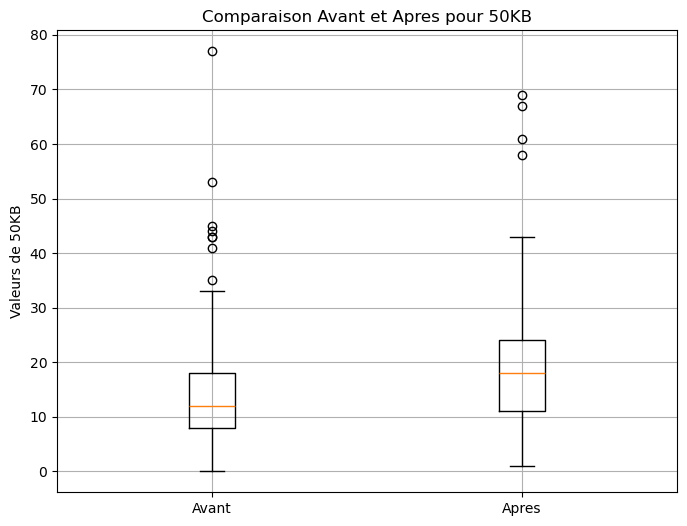

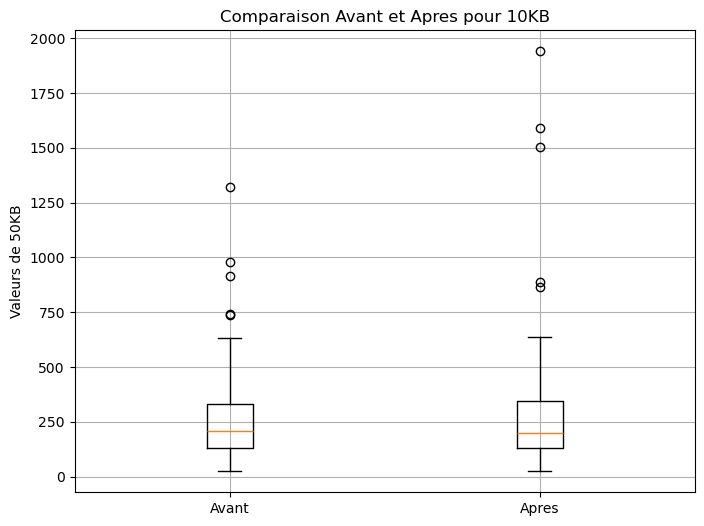

In [114]:
plt.figure(figsize=(8, 6))
plt.boxplot([merged_data['50KB_Avant'], merged_data['50KB_Apres']], labels=['Avant', 'Apres'])
plt.title('Comparaison Avant et Apres pour 50KB')
plt.ylabel('Valeurs de 50KB')
plt.grid(True)
plt.show()



plt.figure(figsize=(8, 6))
plt.boxplot([merged_data['10KB_Avant'], merged_data['10KB_Apres']], labels=['Avant', 'Apres'])
plt.title('Comparaison Avant et Apres pour 10KB')
plt.ylabel('Valeurs de 50KB')
plt.grid(True)
plt.show()

In [117]:
Av5 = merged_data['5KB_Avant'].sum()
Ap5 = merged_data['5KB_Apres'].sum()

Av10 = merged_data['10KB_Avant'].sum()
Ap10 = merged_data['10KB_Apres'].sum()

Av25 = merged_data['25KB_Avant'].sum()
Ap25 = merged_data['25KB_Apres'].sum()

Av50 = merged_data['50KB_Avant'].sum()
Ap50 = merged_data['50KB_Apres'].sum()

TableauAvantApres = {
    'Taille de contigs': ['5 KB', '10 KB', '25 KB', '50 KB'],
    'Avant': [Av5, Av10, Av25, Av50],
    'Apres': [Ap5, Ap10, Ap25, Ap50],
    'Différence': [Ap5 - Av5, Ap10 - Av10, Ap25 - Av25, Ap50 - Av50]
}

# Créer le DataFrame
df_summary = pd.DataFrame(TableauAvantApres)

# Afficher le tableau
print(df_summary)


  Taille de contigs     Avant  Apres  Différence
0              5 KB  110422.0  91850    -18572.0
1             10 KB   21178.0  24019      2841.0
2             25 KB    4705.0   4967       262.0
3             50 KB    1228.0   1590       362.0


In [4]:
df = pd.read_csv("Annotations_real_sort.csv",sep=",")
df.head()

,Name,Sequence Name,Type,Minimum,Maximum,Length,# Intervals,Direction
0,rpoC2b gene,Bin_CERT_32_38-contigsc0001,gene,274518,275335,818,1,reverse
1,rpl19-atpA gene,Bin_CERT_32_38-contigsc0001,gene,272295,273554,1260,1,forward
2,aptA-fragment gene,Bin_CERT_32_38-contigsc0001,gene,272228,273436,1209,1,forward
3,atpA-fragment gene,Bin_CERT_32_38-contigsc0001,gene,272211,273620,1410,1,forward
4,atpF-fragment gene,Bin_CERT_32_38-contigsc0001,gene,271592,271714,123,1,forward


In [5]:
genes_per_sequence = df.groupby('Sequence Name').size()

# Afficher le résultat
print(genes_per_sequence.mean())

250.47894736842105


In [6]:
rbcL_genes = df[df['Name'].str.contains('rbcL')]

# Compter le nombre de gènes rbcL par 'Sequence Name'
rbcL_per_sequence = rbcL_genes.groupby('Sequence Name').size()

# Afficher le résultat
print(rbcL_per_sequence.mean())

2.189873417721519


In [16]:
df1 = pd.read_csv("GroupDREP1042_Annotated Annotations.csv",sep=",")
print(df1.head())
df2 = pd.read_csv("GroupDREPX1109_Annotated Annotations.csv",sep=",")
print(df2.head())
df3 = pd.read_csv("GroupDREPX1162_Annotated Annotations.csv",sep=",")
df3.head()

        Name                               Sequence Name  Minimum  Maximum  \
0  acpP gene  GroupDREP1042_Bin_MEDD_45_2_3-contigsc0202    73518    73916   
1  acpP gene  GroupDREP1042_Bin_MEDD_45_2_3-contigsc0202   100039  >100435   
2  acsF gene  GroupDREP1042_Bin_MEDD_45_2_3-contigsc0202    32555    33604   
3  atpA gene  GroupDREP1042_Bin_MEDD_45_2_3-contigsc0202    60274    61779   
4  atpB gene  GroupDREP1042_Bin_MEDD_45_2_3-contigsc0202    43596    45011   

  Length Direction  
0    399   reverse  
1   >397   forward  
2   1050   reverse  
3   1506   forward  
4   1416   reverse  
            Name                Sequence Name  Minimum  Maximum  Length  \
0  23S rRNA gene     GroupDREPX1109_Consensus    89035    89157     123   
1      accD gene     GroupDREPX1109_Consensus    81315    81884     570   
2      acpP gene     GroupDREPX1109_Consensus    68890    69297     408   
3      acpP gene  Bin_TOTR_46_51-contigsc0628     5868     6275     408   
4      acsF gene     GroupDREP

,Name,Sequence Name,Minimum,Maximum,Length,Direction
0,23S rRNA gene,GroupDREPX1162_Consensus,5408,5581,174,reverse
1,acpP gene,GroupDREPX1162_Consensus,45013,45426,414,forward
2,acsF gene,GroupDREPX1162_Consensus,90646,91701,1056,forward
3,atpA gene,GroupDREPX1162_Consensus,58824,60329,1506,reverse
4,atpA gene,Bin_PIBR_65_68-contigsc1164,7646,9157,1512,reverse


In [18]:
gene_counts = df1['Name'].value_counts()

# Filtrer les gènes uniques
unique_genes = gene_counts[gene_counts == 1].index

# Afficher le nombre de gènes uniques
print(f"Nombre de gènes uniques : {len(unique_genes)}")
print("Gènes uniques :", unique_genes)

Nombre de gènes uniques : 97
Gènes uniques : Index(['pafI gene', 'rps11 gene', 'rps10 gene', 'rps9 gene', 'rps8 gene',
       'rps7 gene', 'rps5 gene', 'rps4 gene', 'rps3 gene', 'rps2 gene',
       'atpE gene', 'rps13 gene', 'rpoC1 gene', 'rpoB gene', 'rpoA gene',
       'rpl36 gene', 'rpl35 gene', 'rpl34 gene', 'rpl33 gene', 'rpl31 gene',
       'rpl29 gene', 'rpl27 gene', 'rpl24 gene', 'rps12 gene', 'rps16 gene',
       'rps14 gene', 'thiS gene', 'ycf62 gene', 'atpA gene', 'ycf19 gene',
       'tufA gene', 'trnW gene', 'trnL gene', 'atpB gene', 'atpD gene',
       'trnC-GCA gene', 'tatC gene', 'rpl22 gene', 'sufC gene', 'sufB gene',
       'secY gene', 'secA gene', 'rrnS2 gene', 'rps20 gene', 'rps19 gene',
       'rps18 gene', 'rps17 gene', 'rpl23 gene', 'rpl20 gene', 'rpl21 gene',
       'orf249 gene', 'ccs1 gene', 'ccsA' gene', 'chlI gene', 'clpC gene',
       'clpN gene', 'psbD gene', 'cp43 | psbC gene', 'psbA gene', 'dnaK gene',
       'groEL gene', 'ilvB gene', 'ilvN gene', 'psa

In [19]:
gene_counts = df2['Name'].value_counts()

# Filtrer les gènes uniques
unique_genes = gene_counts[gene_counts == 1].index

# Afficher le nombre de gènes uniques
print(f"Nombre de gènes uniques : {len(unique_genes)}")
print("Gènes uniques :", unique_genes)

Nombre de gènes uniques : 97
Gènes uniques : Index(['ycf40 gene', 'rps8 gene', 'rps14 gene', 'rpl36 gene', 'rps12 gene',
       'ycf36 gene', 'rps10 gene', 'rps7 gene', 'rpoC2b gene', 'rpl36 Gene',
       'rps4 gene', 'RplF gene', 'rplN | rpl14 gene', 'rpoB gene',
       'ycf54 gene', 'syfB gene', 'trnY-GUA gene', 'ycf4 gene',
       'trnG-UCC gene', 'thiS gene', 'tRNA-Lys(ttt) gene', 'rrsA gene',
       'rrs 2 gene', 'rrna16S gene', 'rrn16S gene', 'trnD-GUC gene',
       'trnF gene', 'rpsS | rps19 gene', 'trnM-CAU gene', 'tufA gene',
       'rpsC gene', 'rps20 gene', 'rps19 | petB gene', 'rps18 gene',
       'trnQ-UUG gene', 'trnR-ACG gene', 'rps17 gene', 'trnW-CCA  gene',
       'tatC gene', 'rpl35 gene', '23S rRNA gene', 'rpl33 gene', 'rpl31 gene',
       'petL gene', 'petJ gene', 'petG gene', 'petF gene', 'petB gene',
       'petA gene', 'pafI gene', 'orf249 gene', 'orf144 gene', 'ORF65a gene',
       'orf1 gene', 'ndhK-fragment gene', 'ilvN gene', 'ilvB gene',
       'dnaK gene', 

In [21]:
gene_counts = df3['Name'].value_counts()

# Filtrer les gènes uniques
unique_genes = gene_counts[gene_counts == 1].index

# Afficher le nombre de gènes uniques
print(f"Nombre de gènes uniques : {len(unique_genes)}")
print("Gènes uniques :", unique_genes)

Nombre de gènes uniques : 107
Gènes uniques : Index(['rpoC2 gene', 'rplN gene', 'rplL gene', 'rps 14  gene', 'rps2 gene',
       'rpl35 gene', 'rpoA gene', '23S rRNA gene', 'rpl31 gene', 'rpl29 gene',
       ...
       'psbC gene', 'psbB gene', 'psbA gene', 'psb30 gene', 'psaL gene',
       'psaJ gene', 'psaI gene', 'psaF gene', 'psaD gene', 'ycf66 gene'],
      dtype='object', name='Name', length=107)
